In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [2]:
test_n = "./data/0_Golden_Standard/test/countries_flights_backbone_02_w1.csv"
test_w = "./data/0_Golden_Standard/test/countries_flights_backbone_02_real_w.csv"

In [5]:
test = pd.read_csv(test_n,sep=',')
test

,source,target,fake weight
0,Albania,Greece,1
1,Albania,Slovenia,1
2,Bosnia and Herzegovina,Slovenia,1
3,Montenegro,Slovenia,1
4,North Macedonia,Slovenia,1
5,Greece,Albania,1
6,Slovenia,Albania,1
7,Croatia,Bosnia and Herzegovina,1
8,Serbia,Bosnia and Herzegovina,1
9,Slovenia,Bosnia and Herzegovina,1


In [3]:
Data = open(test_n, "r")

next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=str, data=(('weight', float),))

In [4]:
Data2 = open(test_w, "r")

next(Data2, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G_w = nx.read_weighted_edgelist(Data2, delimiter=',', create_using=Graphtype, nodetype=str,)

#nx.parse_edgelist(Data2, delimiter=',', create_using=Graphtype,
#                      nodetype=str, data=(('weight', float),))

In [5]:
G

In [6]:
G.nodes()

NodeView(('Albania', 'Greece', 'Slovenia', 'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia', 'Croatia', 'Serbia'))

In [7]:
G.edges()

EdgeView([('Albania', 'Greece'), ('Albania', 'Slovenia'), ('Slovenia', 'Bosnia and Herzegovina'), ('Slovenia', 'Montenegro'), ('Slovenia', 'North Macedonia'), ('Bosnia and Herzegovina', 'Croatia'), ('Bosnia and Herzegovina', 'Serbia')])

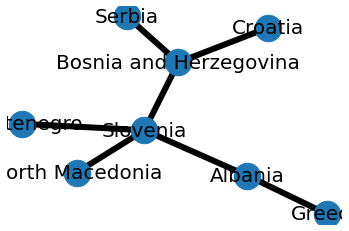

In [8]:
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges,
                       width=6)
#nx.draw_networkx_edges(G, pos, edgelist=esmall,
#                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [9]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, './distance_measure/implementation')

import network_distance as nd

In [10]:
#what nodes should be in source and what nodes in target?

src = {"Greece":1}
trg = {"Serbia":1}

In [11]:
ge_dist = nd.ge(src, trg, G)
ge_dist

2.000000000000001

In [12]:
src2 = {"Greece":1, "Serbia":1}
trg2 = {"Slovenia":1}

In [13]:
ge_dist2 = nd.ge(src2, trg2, G)
ge_dist2

0.9999999999999999

In [14]:
src3 = {"Greece":1, "Serbia":1, "Slovenia":1}
trg3 = {"Macedonia":1, "Croatia": 1, "Albania": 1}

In [15]:
ge_dist3 = nd.ge(src3, trg3, G)
ge_dist3

0.7264831572567788

In [16]:
src4 = {"Greece":1}
trg4 = {"Albania":1}

In [17]:
ge_dist4 = nd.ge(src4, trg4, G)
ge_dist4

0.9999999999999999

In [18]:
src5 = {"Greece":1}
trg5 = {"Slovenia":1}

In [19]:
ge_dist5 = nd.ge(src5, trg5, G)
ge_dist5

1.4142135623730951

In [20]:
#Testing weighted networks
ge_dist_w = nd.ge(src, trg, G_w)
ge_dist_w

2.1004063767041776